### IMPORTING LIBRARIES

In [278]:
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### IMPORTING DATA

In [279]:
data = pd.read_csv(r"C:\Users\Skill-Lync\Downloads\Amazon_Product Reviews_Dataset_Project 2.csv")

In [280]:
data.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",No issues.,4.0,Four Stars,1406073600,2014-07-23,138,0,0
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]","Purchased this for my device, it worked as adv...",5.0,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",it works as expected. I should have sprung for...,4.0,nothing to really say....,1356220800,2012-12-23,715,0,0
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",This think has worked out great.Had a diff. br...,5.0,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]","Bought it with Retail Packaging, arrived legit...",5.0,best deal around,1373673600,2013-07-13,513,0,0


In [281]:
data.overall = data.overall.astype(int)

### CONVERTING OVERALL COLUMN (TO REVIEWS POSTIVE,NEGATIVE,NEUTRAL)

In [282]:
data.overall.replace(to_replace=[4,5,3,2,1],value=["positive","positive","positive","negative","negative"],inplace=True)
data.rename({"overall":"sentiments"},axis=1,inplace=True)
data.head()

,reviewerID,asin,reviewerName,helpful,reviewText,sentiments,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",No issues.,positive,Four Stars,1406073600,2014-07-23,138,0,0
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]","Purchased this for my device, it worked as adv...",positive,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",it works as expected. I should have sprung for...,positive,nothing to really say....,1356220800,2012-12-23,715,0,0
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",This think has worked out great.Had a diff. br...,positive,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]","Bought it with Retail Packaging, arrived legit...",positive,best deal around,1373673600,2013-07-13,513,0,0


In [283]:
data.sentiments.value_counts()

positive    4591
negative     324
Name: sentiments, dtype: int64

### NULL VALUES

In [284]:
data.isnull().sum()

reviewerID        0
asin              0
reviewerName      1
helpful           0
reviewText        1
sentiments        0
summary           0
unixReviewTime    0
reviewTime        0
day_diff          0
helpful_yes       0
total_vote        0
dtype: int64

In [285]:
data.reviewText.fillna("missing",inplace=True)
data.reviewerName.fillna("missing",inplace=True)

In [286]:
data.isnull().sum()

reviewerID        0
asin              0
reviewerName      0
helpful           0
reviewText        0
sentiments        0
summary           0
unixReviewTime    0
reviewTime        0
day_diff          0
helpful_yes       0
total_vote        0
dtype: int64

### CONCATENATING REWIEWTEXT AND SUMMARY

In [287]:
data["reviews"] = data["reviewText"]+data["summary"]

In [288]:
data.drop(["reviewText","summary"],axis=1,inplace=True)

In [289]:
data.head()

,reviewerID,asin,reviewerName,helpful,sentiments,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote,reviews
0,A3SBTW3WS4IQSN,B007WTAJTO,missing,"[0, 0]",positive,1406073600,2014-07-23,138,0,0,No issues.Four Stars
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]",positive,1382659200,2013-10-25,409,0,0,"Purchased this for my device, it worked as adv..."
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",positive,1356220800,2012-12-23,715,0,0,it works as expected. I should have sprung for...
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",positive,1384992000,2013-11-21,382,0,0,This think has worked out great.Had a diff. br...
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]",positive,1373673600,2013-07-13,513,0,0,"Bought it with Retail Packaging, arrived legit..."


### CREATING NEW DATA OF IMPORTANT COLUMNS

In [290]:
new_data = data[["reviews","sentiments"]]

In [291]:
new_data.head()

,reviews,sentiments
0,No issues.Four Stars,positive
1,"Purchased this for my device, it worked as adv...",positive
2,it works as expected. I should have sprung for...,positive
3,This think has worked out great.Had a diff. br...,positive
4,"Bought it with Retail Packaging, arrived legit...",positive


### TEXT CLASSIFICATION

In [292]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer,WordNetLemmatizer
lm = WordNetLemmatizer()
pt = PorterStemmer()
stop_word = set(stopwords.words('english'))

In [293]:
def remove_punct(text):
    text = text.lower()
    text = "".join([char for char in text if (char not in string.punctuation) and (char not in string.digits)])
    text = text.split()
    text2 = [lm.lemmatize(i) for i in text if i not in stop_word]
    final_text = " ".join(text2)
    return final_text

In [294]:
new_data["clean_text"]=new_data.reviews.apply(lambda x : remove_punct(x))

In [295]:
new_data.head()

,reviews,sentiments,clean_text
0,No issues.Four Stars,positive,issuesfour star
1,"Purchased this for my device, it worked as adv...",positive,purchased device worked advertised never much ...
2,it works as expected. I should have sprung for...,positive,work expected sprung higher capacity think mad...
3,This think has worked out great.Had a diff. br...,positive,think worked greathad diff bran gb card went s...
4,"Bought it with Retail Packaging, arrived legit...",positive,bought retail packaging arrived legit orange e...


### INPUT AND TARGET VARIABLE

In [266]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
new_data.sentiments = lb.fit_transform(new_data.sentiments)
new_data.head()

,reviews,sentiments,clean_text
0,No issues.Four Stars,2,issuesfour star
1,"Purchased this for my device, it worked as adv...",2,purchased device worked advertised never much ...
2,it works as expected. I should have sprung for...,2,work expected sprung higher capacity think mad...
3,This think has worked out great.Had a diff. br...,2,think worked greathad diff bran gb card went s...
4,"Bought it with Retail Packaging, arrived legit...",2,bought retail packaging arrived legit orange e...


In [250]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
new_data.sentiments = lb.fit_transform(new_data.sentiments)
new_data.head()

,reviews,sentiments,clean_text
0,No issues.Four Stars,2,issuesfour star
1,"Purchased this for my device, it worked as adv...",2,purchased device worked advertised never much ...
2,it works as expected. I should have sprung for...,2,work expected sprung higher capacity think mad...
3,This think has worked out great.Had a diff. br...,2,think worked greathad diff bran gb card went s...
4,"Bought it with Retail Packaging, arrived legit...",2,bought retail packaging arrived legit orange e...


In [307]:
x = new_data["clean_text"]
y = new_data["sentiments"]

In [308]:
x.shape

(4915,)

In [309]:
y.shape

(4915,)

### CONVERTING TEXT TO VECTORS USING TF-IDF

In [205]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
tf = TfidfVectorizer(max_features=5000,ngram_range=((2,2)))
x = tf.fit_transform(x)

### BALANCING THE DATA

<AxesSubplot:xlabel='sentiments', ylabel='count'>

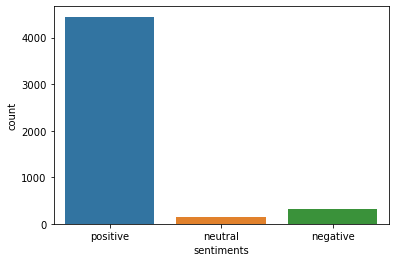

In [206]:
import seaborn as sns
sns.countplot(y)

In [207]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x,y = sm.fit_resample(x,y)

###  IMPORTING SUPERVISED MODELS

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

### TRAIN-TEST-SPLIT

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y)

### LOGISTIC REGRESSION

In [27]:
lr = LogisticRegression(multi_class="ovr")
lr.fit(x_train,y_train)
lr_pred = lr.predict(x_test)

### DECISION TREE

In [28]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_pred = dt.predict(x_test)

### NAIVE BAYES

In [29]:
nb = MultinomialNB()
nb.fit(x_train,y_train)
nb_pred = nb.predict(x_test)

### KNEAREST

In [30]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
knn_pred = knn.predict(x_test)

### COMAPARING ALL THE MODELS

In [31]:
print("logistic accuracy : ",accuracy_score(lr_pred,y_test))
print("decision accuracy : ",accuracy_score(dt_pred,y_test))
print("naive ba accuracy : ",accuracy_score(nb_pred,y_test))
print("knearest accuracy : ",accuracy_score(knn_pred,y_test))

logistic accuracy :  0.9370692238537609
decision accuracy :  0.9520527419838178
naive ba accuracy :  0.9274797722505245
knearest accuracy :  0.6799520527419838


* SO DECISION TREE IS PERFORMING WELL

### CONFUSION MATRIX OF DECISION TREE

Text(69.0, 0.5, 'Actual')

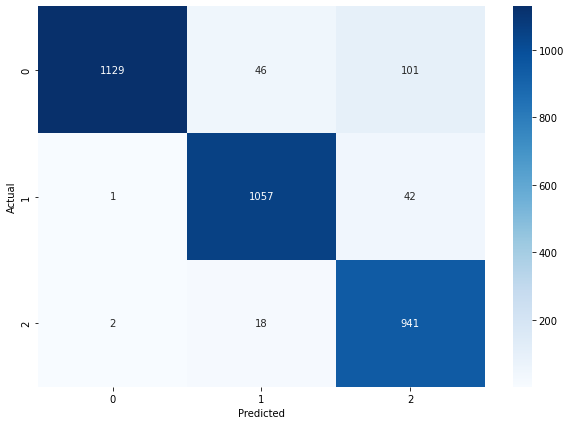

In [34]:
from matplotlib import pyplot as plt
cm=confusion_matrix(lr_pred,y_test)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True,cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')


### PREDICTION USING DECISION TREE

In [ ]:
msg = input("Enter Message: ") # to get the input message
msgInput = tf.transform([msg]) # 
predict = dt.predict(msgInput)
if(predict[0]==0):
    print("neutral_review")
elif(predict[0]==1):
    print("negative review")
elif(predict[0]==2):
    print("positve review")

### CHECKING MODEL IS OVERFITTED

In [35]:
dt_train_pred = dt.predict(x_train)


In [36]:
print("training accuracy : ",accuracy_score(dt_train_pred,y_train))
print("testing  accuracy : ",accuracy_score(dt_pred,y_test))

training accuracy :  0.9976023976023976
testing  accuracy :  0.9520527419838178


* It can be seen that there is no much difference between training and testing accuracy .
* We can say that model is neither overfitted nor underfitted.
* Hence we create an optimized model.

In [327]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
new_data.sentiments = lb.fit_transform(new_data.sentiments)
new_data.head()

,reviews,sentiments,clean_text
0,No issues.Four Stars,1,issuesfour star
1,"Purchased this for my device, it worked as adv...",1,purchased device worked advertised never much ...
2,it works as expected. I should have sprung for...,1,work expected sprung higher capacity think mad...
3,This think has worked out great.Had a diff. br...,1,think worked greathad diff bran gb card went s...
4,"Bought it with Retail Packaging, arrived legit...",1,bought retail packaging arrived legit orange e...


In [328]:
x = new_data["clean_text"]
y = new_data["sentiments"]

In [329]:
from keras_preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=20000) #initializing the tokenizer
tokenizer.fit_on_texts(x)
text_to_sequence = tokenizer.texts_to_sequences(x) 

In [330]:
maxseqlen = max([len(i.split()) for i in x])
input_dim = len(tokenizer.word_index)+1
top_words = 20000
print(maxseqlen)
print(input_dim)

796
12518


In [331]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [332]:
x = pad_sequences(text_to_sequence, maxlen=maxseqlen)
y = y

In [333]:
x,y = sm.fit_resample(x,y)

In [334]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)
print("x_train : ",x_train.shape,"y_train : ", y_train.shape)
print("x_test : ",x_test.shape,"y_test : ", y_test.shape)

x_train :  (6886, 796) y_train :  (6886,)
x_test :  (2296, 796) y_test :  (2296,)


In [338]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Embedding, Dense, GlobalMaxPool1D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping


model = Sequential()
model.add(Embedding(input_dim = 12518, output_dim = 64))
model.add(LSTM((128), return_sequences = True))
model.add(Dropout(0.4))
model.add(Dense(20, activation='relu'))
model.add(Dense(35, activation='softmax'))
model.add(Dense(10, activation='softmax'))
model.add(Dense(1, activation='sigmoid'))




model.compile(optimizer="adam", loss='binary_crossentropy' ,metrics=['accuracy'])
model.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_29 (Embedding)    (None, None, 64)          801152    
                                                                 
 lstm_29 (LSTM)              (None, None, 128)         98816     
                                                                 
 dropout_59 (Dropout)        (None, None, 128)         0         
                                                                 
 dense_73 (Dense)            (None, None, 20)          2580      
                                                                 
 dense_74 (Dense)            (None, None, 35)          735       
                                                                 
 dense_75 (Dense)            (None, None, 10)          360       
                                                                 
 dense_76 (Dense)            (None, None, 1)         

In [ ]:
import warnings
warnings.filterwarnings('ignore')
early_stop = EarlyStopping(monitor='val_loss', patience=5)
history = model.fit(x_train, y_train,
epochs =30 , validation_split=0.2,validation_data=(x_test,y_test),callbacks=early_stop)

Epoch 1/30
 55/216 [======>.......................] - ETA: 2:28 - loss: 0.6950 - accuracy: 0.4972